<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Gradient Boosting in sklearn

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2">Classification</a></span><ul class="toc-item"><li><span><a href="#Ada-Boost-Classifier" data-toc-modified-id="Ada-Boost-Classifier-2.1">Ada Boost Classifier</a></span></li><li><span><a href="#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-2.2">Gradient Boosting Classifier</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3">Regression</a></span><ul class="toc-item"><li><span><a href="#Ada-Boost-Regressor" data-toc-modified-id="Ada-Boost-Regressor-3.1">Ada Boost Regressor</a></span></li><li><span><a href="#Gradient-Boosting-Regressor" data-toc-modified-id="Gradient-Boosting-Regressor-3.2">Gradient Boosting Regressor</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

## Load the data

In [3]:
boston = datasets.load_boston()
breast = datasets.load_breast_cancer()

## Classification

### Ada Boost Classifier

Apart from the usual model functions, Ada Boost allows us to obtain scores and predictions at each iteration step (`.staged_score` and `.staged_predict`).

1.0
0.9648351648351647
0.9736842105263158
0.9736842105263158


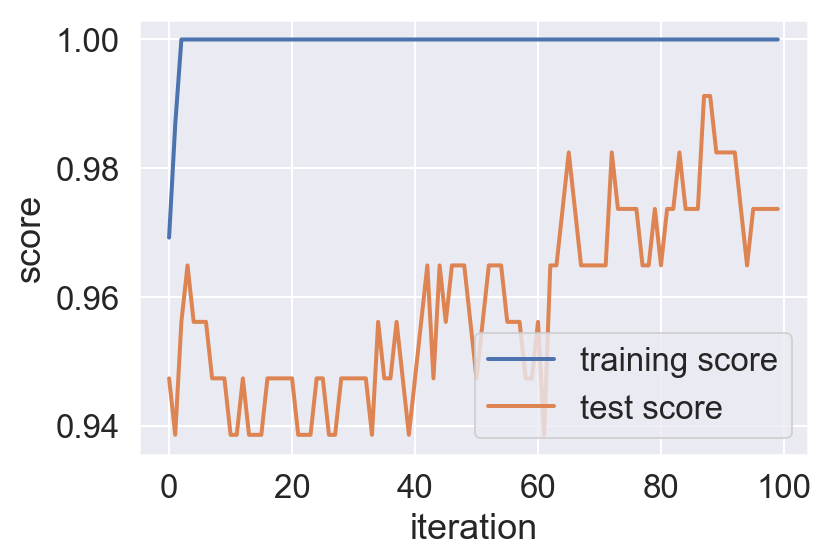

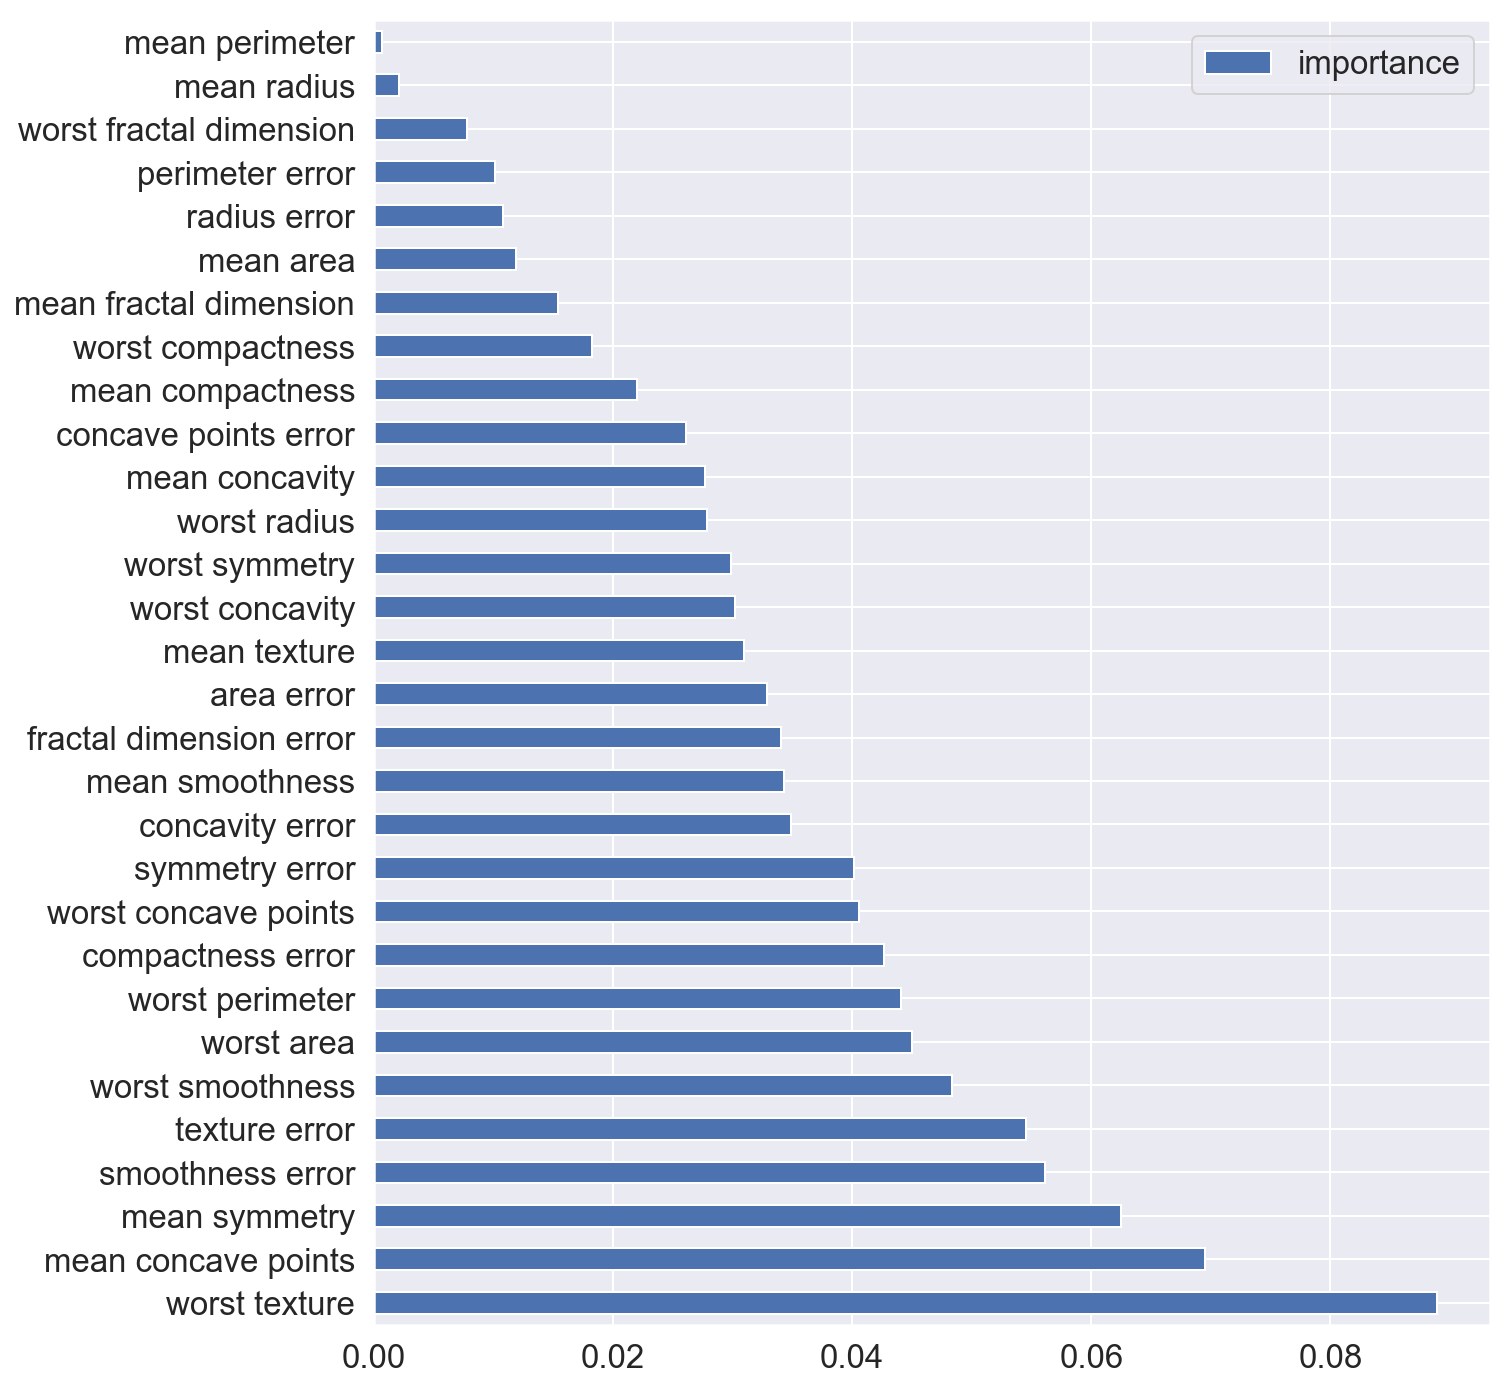

In [4]:
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, test_size=0.2, random_state=1)

base_estimator = DecisionTreeClassifier(max_depth=3)
model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))
print(pd.DataFrame(model.staged_predict(X_test)
                   ).T.apply(lambda x: accuracy_score(y_test, x),
                             axis=0)[model.n_estimators-1])

plt.plot(list(model.staged_score(X_train, y_train)),
         label='training score', lw=2)
plt.plot(list(model.staged_score(X_test, y_test)), label='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=breast.feature_names
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh', figsize=(10, 12))
plt.show()

In [5]:
list(model.staged_score(X_test, y_test))[-20:]

[0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9736842105263158,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

95    0.973684
96    0.973684
97    0.973684
98    0.973684
99    0.973684
dtype: float64


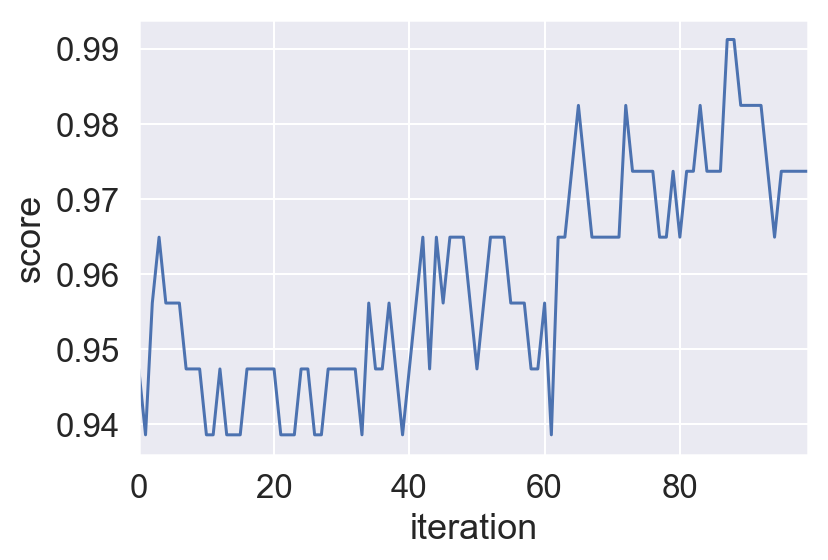

In [6]:
scores = pd.DataFrame(model.staged_predict(X_test)).T.apply(
    lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot()
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

### Gradient Boosting Classifier

Apart from the usual model functions, the Gradient Boosting Regressor allows us to obtain scores and predictions at each iteration step (`.train_score_` and `.staged_predict`).

In [54]:
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, test_size=0.2, random_state=1)

model = GradientBoostingClassifier(n_estimators=100, # this needs to be higher if learning_rate lower
                                   criterion='mse',
                                   loss='exponential',
                                   max_depth=3,
                                   learning_rate=0.1, # best to have a low / slow rate, adjusting tiny bits, you get to capture all the observations correctly
                                   random_state=14)
#                                   validation_fraction=0.1,
#                                   n_iter_no_change=10)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

1.0
0.956043956043956
0.9736842105263158


95    0.973684
96    0.973684
97    0.973684
98    0.973684
99    0.973684
dtype: float64


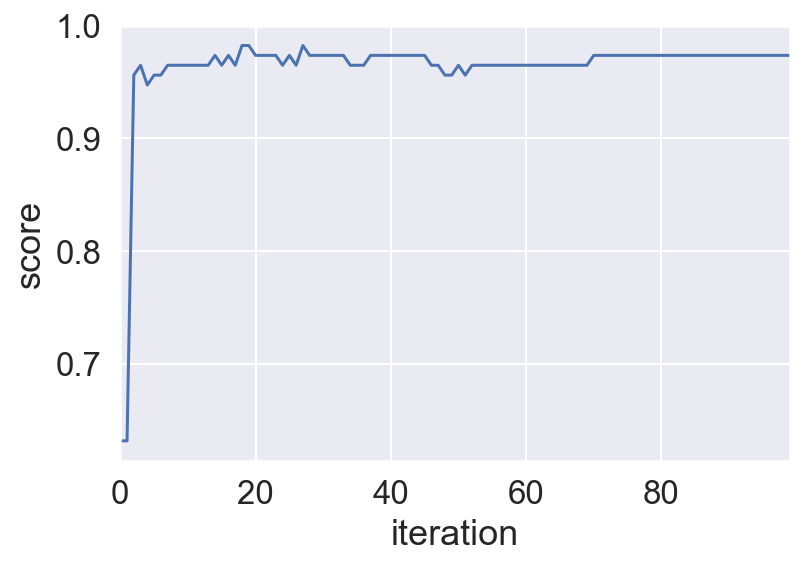

In [55]:
scores = pd.DataFrame(model.staged_predict(X_test)).T.apply(
    lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot()
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

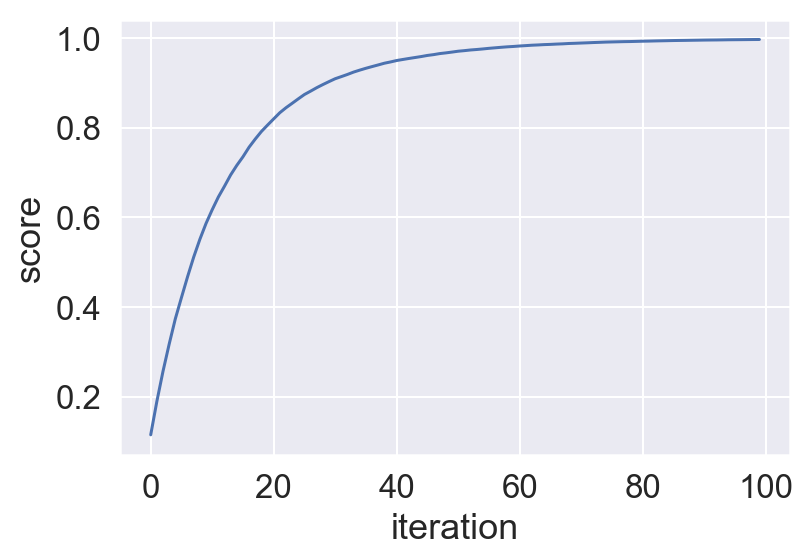

In [56]:
plt.plot(1-model.train_score_)
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

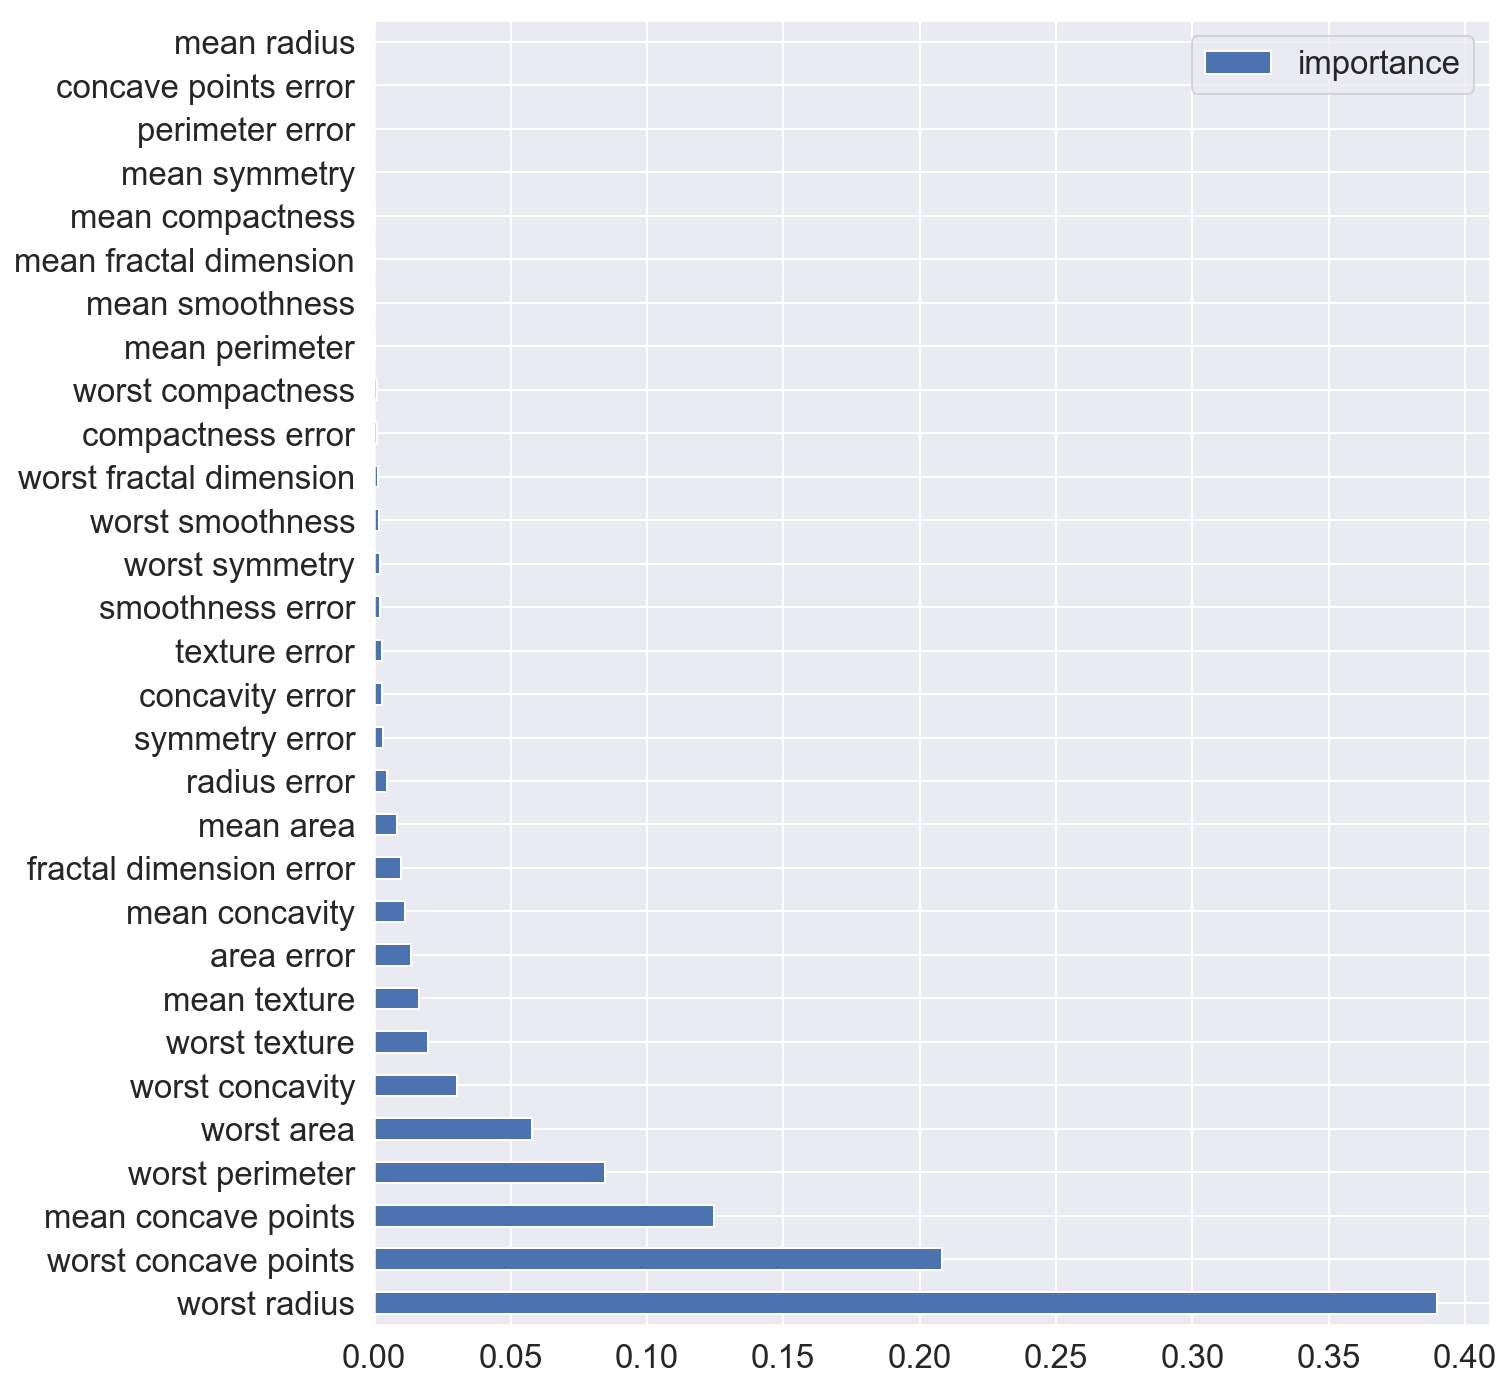

In [57]:
pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=breast.feature_names
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh', figsize=(10, 12))
plt.show()

## Regression

### Ada Boost Regressor

Apart from the usual model functions, Ada Boost allows us to obtain scores and predictions at each iteration step (`.staged_score` and `.staged_predict`).

0.9666569850167821
0.8526523721300812
0.8929192440860242
0.8929192440860242


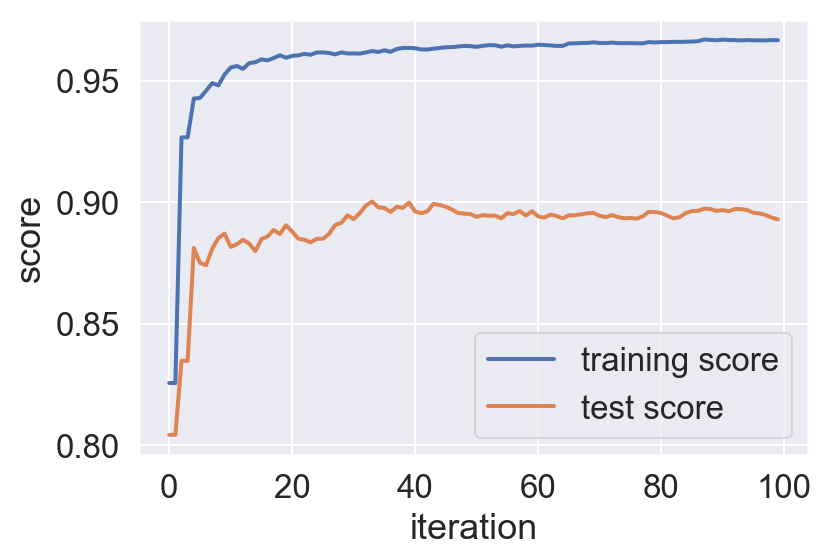

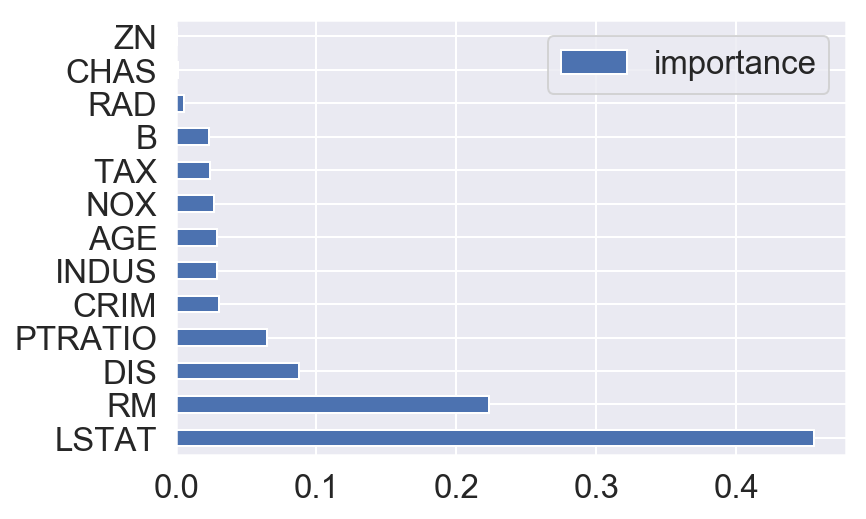

In [11]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.2, random_state=1)

base_estimator = DecisionTreeRegressor(max_depth=5)
model = AdaBoostRegressor(base_estimator=base_estimator,
                          n_estimators=100,
                          random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))
print(pd.DataFrame(model.staged_predict(X_test)
                   ).T.apply(lambda x: r2_score(y_test, x), axis=0)[model.n_estimators-1])

plt.plot(list(model.staged_score(X_train, y_train)),
         label='training score', lw=2)
plt.plot(list(model.staged_score(X_test, y_test)), label='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=boston.feature_names
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh')
plt.show()

### Gradient Boosting Regressor

Apart from the usual model functions, the Gradient Boosting Regressor allows us to obtain scores and predictions at each iteration step (`.train_score_` and `.staged_predict`).

In [12]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

model = GradientBoostingRegressor(n_estimators=100,
                                  max_depth=3,
                                  learning_rate=0.1,
                                  random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

0.977914662228525
0.8636016139902261
0.9166827837771546


In [13]:
pd.DataFrame(model.staged_predict(X_test)).T.apply(
    lambda x: r2_score(y_test, x), axis=0)[model.n_estimators-1]

0.9166827837771547

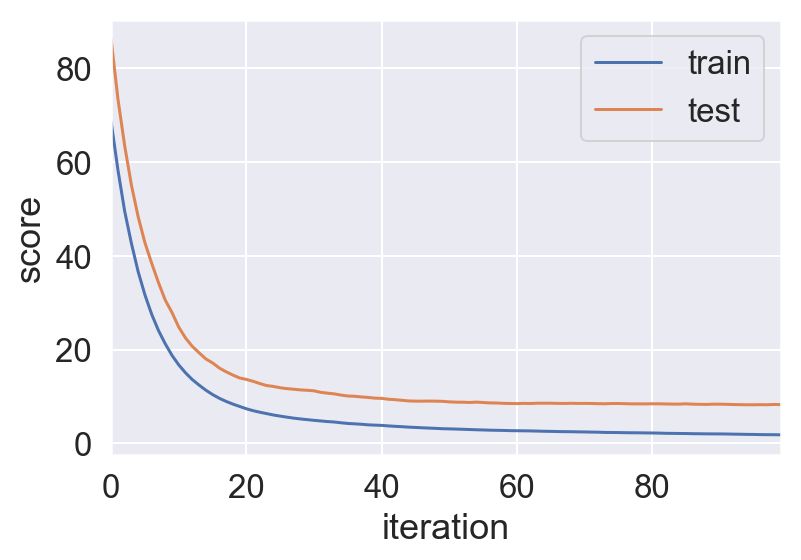

In [14]:
scores = pd.DataFrame(model.staged_predict(X_test)).T.apply(
    lambda x: mean_squared_error(y_test, x), axis=0)
plt.plot(model.train_score_, label='train')
scores.plot(label='test')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

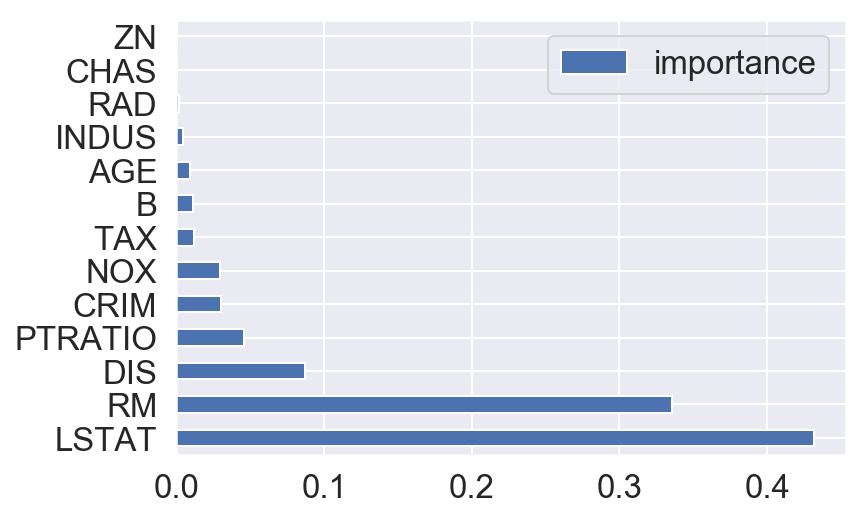

In [15]:
pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=boston.feature_names
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh')
plt.show()

In [16]:
model.n_estimators_

100

In [27]:
# Note with Boosting... because you're moving in direction of higher variance (from low variance learners)
# you may overfit to training data if you have too high n_estimators. So you need to tune the n_estimators as
# below (using a 'hold-out' secondary test data to run tests on)

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

model = GradientBoostingRegressor(n_estimators=500,
                                  max_depth=3,
                                  learning_rate=0.1,
                                  random_state=1,
                                 validation_fraction=0.1, # what fraction is hold-out test data
                                 n_iter_no_change=20) # check if improvement for 20 iters, if not then stop (a balance, needs to be a good check but not too long)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

0.9692135302654191
0.8564450721728051
0.8821675709926791


In [28]:
model.n_estimators_ # here it stopped after 153 models, ie estimators

153